In [1]:
import logging
import sys
import os
%cd ..
from bds.meel import approx_mc2, approx_mc2_core
from bds.rule import Rule
from bds.utils import bin_random , bin_array, randints, solutions_to_dict

from bds.bb import BranchAndBoundNaive, BranchAndBoundV1, BranchAndBoundV0, BranchAndBoundV2
from logzero import logger
import gmpy2 as gmp
from gmpy2 import mpz , mpfr
from bds.sat.min_freq import construct_min_freq_program
from bds.sat.solver import construct_solver
from bds.gf2 import GF
from bds.rule import Rule
from bds.utils import mpz_set_bits
from tests.utils import assert_dict_allclose, assert_close_mpfr

from bds.bounds_utils import find_equivalence_classes
import numpy as np 

logger.setLevel(logging.DEBUG)

num_pts = 500

show_progres = True
rand_seed = 1234

/u/50/ciaperm1/data/Desktop/sampling-rashomon-decision-set-code


In [3]:
from time import time

#num_rules_list = reversed([25, 50, 75, 100, 200])
ub = 0.7
lmbd = 0.1
res_rows = []
all_times_naive = []
all_times_V1 = [] 
all_times_V0 = [] 

for num_rules in [5]:
    
    rules = [Rule.random(i+1, num_pts) for i in range(num_rules)]
    y = bin_random(num_pts)
    
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    
    
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)

    
    
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    

[D 230510 14:22:37 bb:74] calling BranchAndBoundNaive with ub=0.7, lmbd=0.1
[D 230510 14:22:37 bb:74] calling BranchAndBoundV0 with ub=0.7, lmbd=0.1
[D 230510 14:22:37 bb:74] calling BranchAndBoundV1 with ub=0.7, lmbd=0.1


In [3]:
os.chdir("/u/50/ciaperm1/unix/Desktop/sampling-rashomon-decision-set-code")

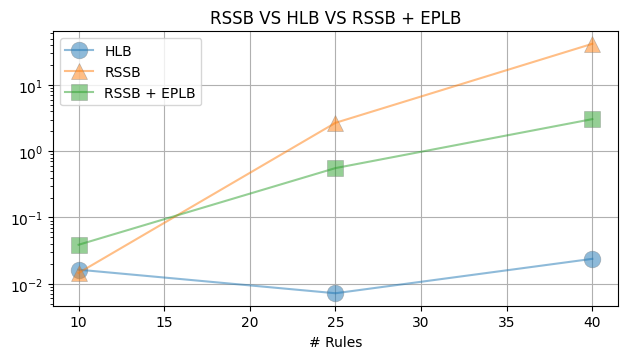

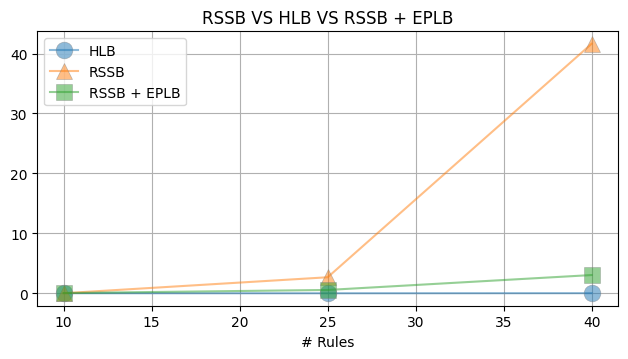

In [7]:
import matplotlib.pyplot as plt 

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# plot 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
plt.plot([10, 25, 40], all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0], markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V0, label="RSSB", marker = "^",  linewidth=1.5 ,  color = colors[1],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V1, label="RSSB + EPLB", marker = "s", linewidth=1.5 ,  color = colors[2],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.yscale("log") 
plt.title("RSSB VS HLB VS RSSB + EPLB") 
plt.xlabel("# Rules")
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/log_first_comparison_bounds" + ".pdf")
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
plt.plot([10, 25, 40], all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V0, label="RSSB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V1, label="RSSB + EPLB",  marker = "s", linewidth=1.5 ,  color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.title("RSSB VS HLB VS RSSB + EPLB") 
plt.xlabel("# Rules")
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/first_comparison_bounds" + ".pdf" )
plt.show()

#### Check same results 

In [10]:
from time import time

#num_rules_list = reversed([25, 50, 75, 100, 200])
ub = 0.7
lmbd = 0.1
res_rows = []
all_times_naive = []
all_times_V1 = [] 
all_times_V0 = [] 

for num_rules in [10]:
    
    rules = [Rule.random(i+1, num_pts) for i in range(num_rules)]
    y = bin_random(num_pts)
    
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    
    
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)
    
    assert_dict_allclose(actualNaive, actual_V0)
    
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    
    assert_dict_allclose(actualNaive, actual_V1)

[D 230510 11:24:27 bb:74] calling BranchAndBoundNaive with ub=0.7, lmbd=0.1
[D 230510 11:24:27 bb:74] calling BranchAndBoundV0 with ub=0.7, lmbd=0.1
[D 230510 11:24:27 bb:74] calling BranchAndBoundV1 with ub=0.7, lmbd=0.1


In [11]:
actualNaive


{(0, 1): mpfr('0.59999999999999998'),
 (0, 2): mpfr('0.59999999999999998'),
 (0, 3): mpfr('0.61599999999999999'),
 (0, 4): mpfr('0.61799999999999999'),
 (0, 5): mpfr('0.60999999999999999'),
 (0, 6): mpfr('0.60199999999999998'),
 (0, 7): mpfr('0.61599999999999999'),
 (8, 0): mpfr('0.61399999999999999'),
 (0, 9): mpfr('0.61599999999999999'),
 (0, 10): mpfr('0.60799999999999998'),
 (0, 5, 6): mpfr('0.69799999999999995'),
 (0, 6, 7): mpfr('0.69999999999999996'),
 (8, 9, 0): mpfr('0.69599999999999995'),
 (0, 2, 6): mpfr('0.69999999999999996'),
 (8, 0, 2): mpfr('0.69799999999999995'),
 (0, 10, 2): mpfr('0.69599999999999995'),
 (0, 1, 3): mpfr('0.69599999999999995')}

### try real world data 

In [2]:
from sklearn import datasets 

In [3]:
import pandas as pd

In [4]:
# Load the CSV file using Pandas
data = pd.read_csv('data/compas_test-binary.csv')

# Print the data
data.head()

,sex:Male,age:18-20,age:21-22,age:23-25,age:26-45,age:>45,juvenile-felonies:>0,juvenile-misdemeanors:>0,juvenile-crimes:>0,priors:2-3,priors:=0,priors:=1,priors:>3,current-charge-degree:Misdemeanor,recidivate-within-two-years:1
0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [5]:
data.shape

(721, 15)

In [6]:
X = data.to_numpy()

In [7]:
X.shape

(721, 15)

In [8]:
# read labels 
f = open("data/compas_test.label", "r")
labels = []
for row in f.readlines(): 
    labels.append(list(map(int, row.split(" ")[1:])))

In [9]:
y = np.array(labels[1], dtype = bool) 

In [10]:
assert len(y) == X.shape[0]

In [11]:
# now we need to extract rules 
X_bag = [set([j for j, x in enumerate(row) if x]) for row in X]

In [12]:
from bds.fpgrowth import preprocess_transaction_list, build_fptree, fpgrowth_on_tree

In [13]:
lmbd = 0.1
min_support = lmbd * X.shape[0] / 2

In [14]:
input_transactions = [{0, 1, 2}, {0, 1, 3}]  # the input transactions, represented as a list of sets
ordered_input_data = preprocess_transaction_list(
    X_bag, min_support
)
tree = build_fptree(ordered_input_data)
frequent_itemsets = set(fpgrowth_on_tree(tree, set(), min_support))

In [15]:
len(frequent_itemsets)

83

In [16]:
from bds.rule import Rule
from time import time

def compute_truthtable(X,itemset): 
    ''' poorly optimized function '''
    support_list = [] 
    for i in range(X.shape[0]): 
        if sum([X[i][j] for j in itemset]) == len(itemset): 
            support_list.append(i)
                
    truthtable = mpz_set_bits(mpz(), support_list)
    
    return truthtable
    

In [17]:
# Now create rules 
rules = [] 
for i,itemset in enumerate(frequent_itemsets):
    tt = compute_truthtable(X,itemset)
    this_Rule = Rule(id = i+1, name = "rule_" + str(i), cardinality=len(itemset), truthtable=tt)
    # we need the truthtable for this itemset 

    rules.append(this_Rule) 
    

In [18]:
all_times_naive = [] 
all_times_V0 = [] 
all_times_V1 = [] 
all_times_V2 = [] 
#
n_rep = 3 
#
lmbd = 0.1 
ub = 0.4
#
for _  in range(n_rep): 
    #
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    #
    print("HLB done")
    #
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V0, actualNaive)
    #
    print("RSSB done")
    #
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V0, actual_V1)
    #
    print("EPLB + RSSB done")
    #
    start_time = time() 
    bbV2 = BranchAndBoundV2(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV2.run(return_objective=True))
    all_times_V2.append(time() - start_time)
    actual_V2 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V1, actual_V2)
    #
    print("HLB + RSSB done")

[D 230511 16:55:43 bb:74] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230511 16:55:46 bb:74] calling BranchAndBoundV0 with ub=0.4, lmbd=0.1


HLB done


[D 230511 16:57:41 bb:74] calling BranchAndBoundV1 with ub=0.4, lmbd=0.1


RSSB done


[D 230511 17:02:18 bb:74] calling BranchAndBoundV2 with ub=0.4, lmbd=0.1


EPLB + RSSB done


[D 230511 17:02:24 bb:74] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1


HLB + RSSB done


[D 230511 17:02:28 bb:74] calling BranchAndBoundV0 with ub=0.4, lmbd=0.1


HLB done


[D 230511 17:04:40 bb:74] calling BranchAndBoundV1 with ub=0.4, lmbd=0.1


RSSB done


[D 230511 17:08:55 bb:74] calling BranchAndBoundV2 with ub=0.4, lmbd=0.1


EPLB + RSSB done


[D 230511 17:09:00 bb:74] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1


HLB + RSSB done


[D 230511 17:09:04 bb:74] calling BranchAndBoundV0 with ub=0.4, lmbd=0.1


HLB done


[D 230511 17:11:16 bb:74] calling BranchAndBoundV1 with ub=0.4, lmbd=0.1


RSSB done


[D 230511 17:15:31 bb:74] calling BranchAndBoundV2 with ub=0.4, lmbd=0.1


EPLB + RSSB done
HLB + RSSB done


In [67]:
actual_V1

{(0, 14): mpfr('0.18183079056865464'),
 (0, 100): mpfr('0.10000000000000001'),
 (0, 2, 100): mpfr('0.20000000000000001'),
 (0, 100, 4): mpfr('0.20000000000000001'),
 (0, 100, 12): mpfr('0.20000000000000001'),
 (0, 100, 13): mpfr('0.20000000000000001'),
 (0, 100, 14): mpfr('0.20000000000000001'),
 (0, 137, 14): mpfr('0.24854368932038837'),
 (0, 178, 14): mpfr('0.23606102635228848'),
 (0, 100, 15): mpfr('0.20000000000000001'),
 (0, 17, 100): mpfr('0.20000000000000001'),
 (0, 100, 21): mpfr('0.20000000000000001'),
 (0, 27, 100): mpfr('0.20000000000000001'),
 (0, 34, 100): mpfr('0.20000000000000001'),
 (0, 100, 36): mpfr('0.20000000000000001'),
 (0, 100, 38): mpfr('0.20000000000000001'),
 (0, 41, 100): mpfr('0.20000000000000001'),
 (0, 100, 44): mpfr('0.20000000000000001'),
 (0, 100, 46): mpfr('0.20000000000000001'),
 (48, 0, 100): mpfr('0.20000000000000001'),
 (0, 49, 100): mpfr('0.20000000000000001'),
 (0, 50, 100): mpfr('0.20000000000000001'),
 (0, 51, 100): mpfr('0.20000000000000001'),

In [45]:
import matplotlib.pyplot as plt 

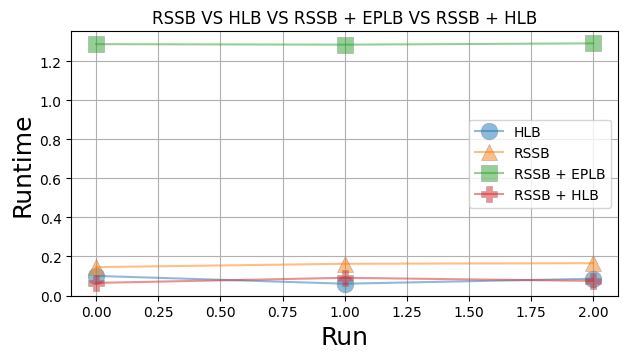

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


x = [i for i in range(n_rep)]
plt.plot(x, all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V0, label="RSSB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V1, label="RSSB + EPLB",  marker = "s", linewidth=1.5 ,  color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V2, label="RSSB + HLB",  marker = "P", linewidth=1.5 ,  color = colors[3],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.title("RSSB VS HLB VS RSSB + EPLB VS RSSB + HLB") 
plt.xlabel("Run", fontsize = 18)
plt.ylabel("Runtime", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/first_comparison_bounds_compas" + ".pdf" )
plt.show()

When there are so few rule equivalent bounds seem to be useless. 

In [47]:
for k in bbV1.equivalence_classes: 
    print(bbV1.equivalence_classes[k].data_points)


{0, 12, 398, 145, 402, 657, 276, 410, 286, 42, 197, 466, 84, 476, 94, 487, 488, 489, 243, 372}
{1, 418, 449, 485, 351, 8, 201, 648, 653, 111, 465, 338, 211, 661, 28, 606, 159}
{128, 2, 259, 519, 520, 521, 650, 273, 149, 34, 290, 164, 296, 426, 299, 172, 428, 433, 180, 308, 310, 59, 699, 574, 319, 576, 454, 582, 710, 711, 332, 589, 78, 591, 337, 467, 217, 346, 607, 608, 99, 376, 103, 359, 620, 493, 241, 114, 499, 117, 247, 248, 379, 509}
{3, 643, 587, 434, 602}
{4, 262, 268, 664, 542, 543, 671, 679, 553, 46, 686, 568, 581, 586, 333, 464, 85, 361, 109, 502, 127}
{5}
{133, 6, 540, 289, 36, 292, 684, 304, 49, 50, 692, 696, 701, 195, 199, 714, 79, 468, 596, 475, 478, 229, 364, 494, 123, 638}
{424, 137, 663, 7}
{9, 178, 23}
{673, 482, 323, 579, 613, 422, 233, 10, 619, 271, 336, 532, 53, 214, 246, 122, 315, 381}
{322, 678, 297, 11, 203, 395, 366, 399, 219, 667, 191}
{13, 143, 566, 534, 446}
{647, 522, 14, 639, 277, 415, 423, 169, 431, 48, 177, 560, 179, 316, 573, 77, 463, 481, 363, 370, 511}
